# PROYECTO DATA SCIENCE GIORDANO 

# Análisis del consumo de videojuegos a nivel global

# ABSTRACT

# El presente proyecto tiene como objetivo analizar el consumo global de videojuegos utilizando herramientas de visualización de datos en Python. A partir de tres conjuntos de datos —ventas de videojuegos (`sales.xslx`), características de juegos (`juegos.xlsx`) y perfiles de usuarios (`usuarios.csv`)— se buscan patrones de comportamiento en las preferencias de los jugadores, factores que influyen en las ventas y diferencias regionales en el consumo de videojuegos.

# El análisis contempla variables como género, plataforma, puntuaciones de críticos y usuarios, edad, y clasificación por edades. Se parte de hipótesis como: “los juegos con mejores puntuaciones venden más”, “los géneros preferidos varían según la región”, “las plataformas más nuevas superan en ventas a las clásicas” y “la edad de los usuarios influye en las puntuaciones otorgadas”.

# Se realizarán visualizaciones univariadas, bivariadas y multivariadas, además de resúmenes estadísticos que permitan responder las preguntas de investigación. También se evaluará la existencia de valores perdidos y su impacto en el análisis. El propósito final es aportar una visión integral del comportamiento del mercado de videojuegos, mediante un enfoque analítico que combine técnica y comprensión del dominio del problema.


In [22]:
#COMENTAR DESPUES DE LA PRIMERA VEZ QUE SERA EJECUTADO
!pip install openpyxl==3.0.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 17.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [25]:
import numpy as np
import pandas as pd
import sqlite3 as sql3 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Cargar datos


In [31]:
# Cargar juegos.xlsx
df_juegos = pd.read_excel('/work/data/juegos.xlsx', index_col=0)
df_juegos

# Cargar usuarios.csv
df_usuarios = pd.read_csv('/work/data/usuarios.csv')
df_usuarios

# Cargar sales.xlsx
df_sales = pd.read_excel('/work/data/sales.xlsx', index_col=0)
df_sales


,game_name,platform,genre,publisher,year,critic_score,user_score,global_sales,na_sales,eu_sales,jp_sales,other_sales
game_id,,,,,,,,,,,,
1,The Legend of Zelda,Switch,Action,Nintendo,2017,97,9.2,23.5,10.0,8.5,2.0,3.0
2,Grand Theft Auto V,PS4,Action,Rockstar Games,2013,96,8.9,29.8,12.0,9.0,1.5,7.3
3,FIFA 21,PS4,Sports,EA Sports,2020,84,6.8,15.2,6.0,7.0,0.2,2.0
4,Animal Crossing,Switch,Simulation,Nintendo,2020,91,8.5,21.4,9.0,6.5,3.2,2.7
5,Call of Duty: Warzone,PS4,Shooter,Activision,2020,78,7.5,19.3,8.2,6.0,0.6,4.5
6,Minecraft,Multi,Adventure,Mojang,2011,93,8.7,35.0,14.5,10.0,2.0,8.5
7,Final Fantasy XV,PS4,RPG,Square Enix,2016,85,7.4,8.9,3.5,3.0,1.2,1.2
8,Mario Kart 8 Deluxe,Switch,Racing,Nintendo,2017,92,8.9,24.1,11.0,6.5,2.5,4.1
9,Fortnite,Multi,Shooter,Epic Games,2017,80,8.1,22.5,10.0,6.0,1.0,5.5


In [34]:
# Identificar valores perdidos
print("Valores perdidos en ventas:")
print(df_sales.isnull().sum())
print("\nValores perdidos en juegos:")
print(df_juegos.isnull().sum())
print("\nValores perdidos en usuarios:")
print(df_usuarios.isnull().sum())


Valores perdidos en ventas:
game_name       0
platform        0
genre           0
publisher       0
year            0
critic_score    0
user_score      0
global_sales    0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
dtype: int64

Valores perdidos en juegos:
title             0
genre             0
platform          0
release_year      0
multiplayer       0
critic_score      0
esrb_rating       0
publisher         0
duration_hours    0
dtype: int64

Valores perdidos en usuarios:
user_id           0
age               0
gender            0
region            4
favorite_genre    0
game_rated        0
user_score        0
dtype: int64


# #Exploración de los datasets del proyecto

In [37]:

#Exploración del df de Ventas (sales.xlsx)
print("Exploración del dataset de ventas (sales.xlsx):")
print("Muestra de datos")
print(df_sales.head())
print('\nFormato del dataframe:')
print(df_sales.shape)
print('\nFormato de los datos por columna')
print(df_sales.dtypes)

Exploración del dataset de ventas (sales.xlsx):
Muestra de datos
                     game_name platform       genre       publisher  year  \
game_id                                                                     
1          The Legend of Zelda   Switch      Action        Nintendo  2017   
2           Grand Theft Auto V      PS4      Action  Rockstar Games  2013   
3                      FIFA 21      PS4      Sports       EA Sports  2020   
4              Animal Crossing   Switch  Simulation        Nintendo  2020   
5        Call of Duty: Warzone      PS4     Shooter      Activision  2020   

         critic_score  user_score  global_sales  na_sales  eu_sales  jp_sales  \
game_id                                                                         
1                  97         9.2          23.5      10.0       8.5       2.0   
2                  96         8.9          29.8      12.0       9.0       1.5   
3                  84         6.8          15.2       6.0       7.0    

In [40]:
#Exploración del df de Juegos
print("Exploración del dataset de juegos (juegos.xlsx):")
print("Muestra de datos")
print(df_juegos.head())
print('\nFormato del dataframe:')
print(df_juegos.shape)
print('\nFormato de los datos por columna')
print(df_juegos.dtypes)


Exploración del dataset de juegos (juegos.xlsx):
Muestra de datos
          title      genre  platform  release_year  multiplayer  critic_score  \
game_id                                                                         
1        Game A     Action       PS4          2019            1            85   
2        Game B  Adventure  Xbox One          2018            0            78   
3        Game C        RPG    Switch          2020            1            90   
4        Game D     Sports       PS2          2005            1            70   
5        Game E     Racing        PC          2021            0            88   

        esrb_rating publisher  duration_hours  
game_id                                        
1                 E  Nintendo              15  
2                 T      Sony              10  
3                 E        EA              40  
4                 M  2K Games               5  
5                 E   Ubisoft              60  

Formato del dataframe:
(10, 9

In [43]:
#Exploración del df de Usuarios
print("Exploración del dataset de usuarios (usuarios.csv):")
print("Muestra de datos")
print(df_usuarios.head())
print('\nFormato del dataframe:')
print(df_usuarios.shape)
print('\nFormato de los datos por columna')
print(df_usuarios.dtypes)

Exploración del dataset de usuarios (usuarios.csv):
Muestra de datos
   user_id  age gender region favorite_genre  game_rated  user_score
0        1   16      F    NaN         Action           1         8.5
1        2   25      M     EU            RPG           2         7.0
2        3   30      M     JP         Racing           3         9.0
3        4   22      F    NaN         Puzzle           4         6.5
4        5   40      M     EU        Shooter           5         9.5

Formato del dataframe:
(10, 7)

Formato de los datos por columna
user_id             int64
age                 int64
gender             object
region             object
favorite_genre     object
game_rated          int64
user_score        float64
dtype: object


# 
1. ¿Qué género de videojuegos tiene en promedio mayores ventas globales?

In [46]:
# RESOLUCIÓN ANALÍTICA
# Agrupar por género favorito y contar usuarios
my_df2 = df_usuarios.groupby('favorite_genre').size().to_frame('cantidad_usuarios')

# Ordenar por cantidad de usuarios
por_cant = my_df2.sort_values('cantidad_usuarios', ascending=False)

# Mostrar el género favorito más frecuente
print(por_cant.head(1))
print(my_df2.index)

                cantidad_usuarios
favorite_genre                   
Action                          1
Index(['Action', 'Adventure', 'Fighting', 'Platform', 'Puzzle', 'RPG',
       'Racing', 'Shooter', 'Simulation', 'Sports'],
      dtype='object', name='favorite_genre')


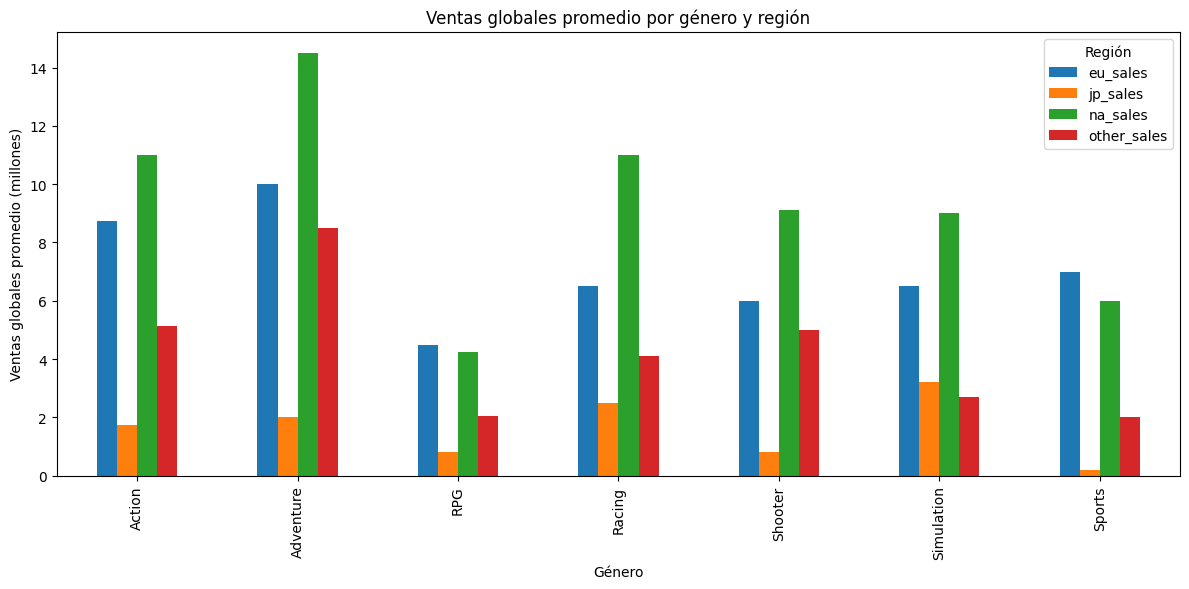

In [85]:
# RESOLUCIÓN GRÁFICA
#Análisis multivariado (barras)
#Estructurar la data para calcular el average sales for each region
region_sales = df_sales[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
region_sales = region_sales.melt(id_vars='genre', var_name='region', value_name='sales')

#  Creamos una tabla dinámica para obtener el promedio de ventas por género y región
pivot = region_sales.pivot_table(values='sales', index='genre', columns='region', aggfunc='mean')

# Gráfico multivariado: ventas promedio por género y región
pivot.plot(kind='bar', figsize=(12,6))
plt.title('Ventas globales promedio por género y región')
plt.xlabel('Género')
plt.ylabel('Ventas globales promedio (millones)')
plt.legend(title='Región')
plt.tight_layout()
plt.show()

Este gráfico permite visualizar cómo varían las ventas promedio de cada género de videojuegos según la región, identificando géneros populares en cada mercado y posibles oportunidades de negocio.

# #2. ¿Existen diferencias en la preferencia de géneros o plataformas entre regiones?

In [73]:
# RESOLUCIÓN ANALÍTICA
# Tabla de frecuencias de género favorito por región
tabla = pd.crosstab(df_usuarios['region'], df_usuarios['favorite_genre'])
print(tabla)

favorite_genre  Adventure  Fighting  RPG  Racing  Shooter  Simulation
region                                                               
EU                      0         0    1       0        1           1
JP                      1         1    0       1        0           0


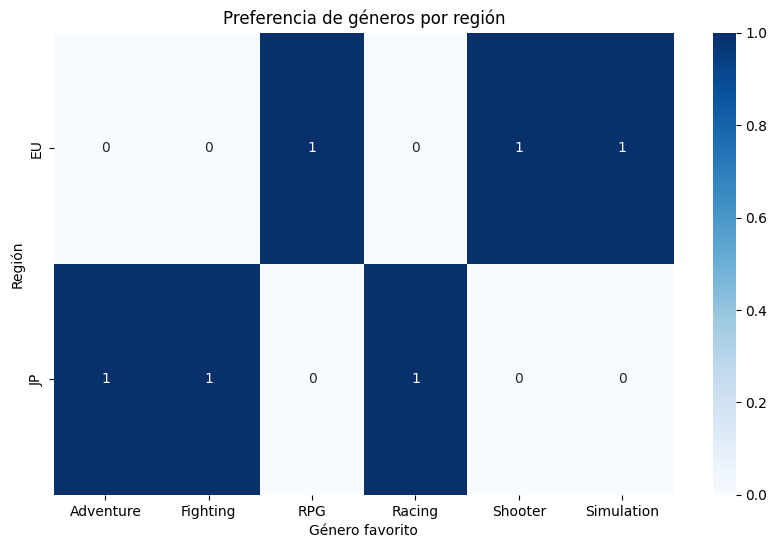

In [82]:
# RESOLUCIÓN GRÁFICA
#Gráfico multivariado (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt='d')
plt.title('Preferencia de géneros por región')
plt.xlabel('Género favorito')
plt.ylabel('Región')
plt.show()

El heatmap muestra la cantidad de usuarios que prefieren cada género en cada región. Si observas diferencias notables en los valores, puedes concluir que existen preferencias distintas según la región.

# #3.¿La puntuación de críticos influye en las ventas?

In [79]:
# RESOLUCIÓN ANALÍTICA

# Supón que tu DataFrame se llama df y tiene las columnas 'critic_score' y 'global_sales'
correlacion = df_sales[['critic_score', 'global_sales']].corr().loc['critic_score', 'global_sales']
print(f"Correlación entre la puntuación de críticos y las ventas globales: {correlacion:.2f}")

Correlación entre la puntuación de críticos y las ventas globales: 0.47


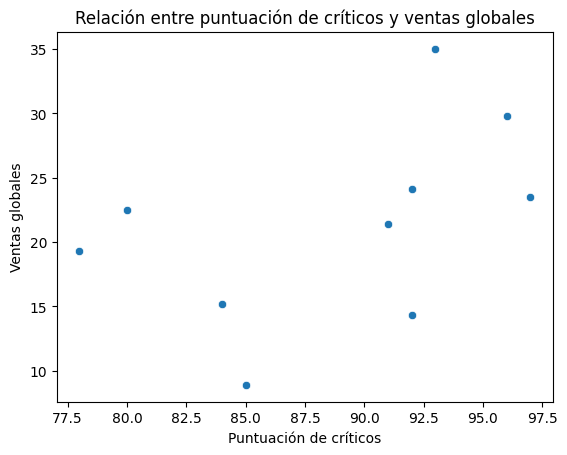

In [97]:
# RESOLUCIÓN GRÁFICA  Gráfico bivariado (dispersión)
# Scatter plot de la correlación entre la puntuación de críticos y las ventas globales
sns.scatterplot(x='critic_score', y='global_sales', data=df_sales)
plt.title('Relación entre puntuación de críticos y ventas globales')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales')
plt.show()




Si la correlación es positiva y el gráfico muestra una tendencia ascendente, puedes concluir que a mayor puntuación de críticos, mayores ventas. Si la correlación es baja o negativa, la influencia es débil o nula.

# #4. ¿Qué publishers dominan el mercado en distintas décadas? 

In [115]:
# RESOLUCIÓN ANALÍTICA
# Extraer la década
df_juegos['decada'] = (df_juegos['release_year'] // 10) * 10

# Contar la cantidad de juegos lanzados por publisher y década
juegos_decada = df_juegos.groupby(['decada', 'publisher']).size().reset_index(name='cantidad_juegos')

# Encontrar el publisher con más lanzamientos en cada década
top_publishers = juegos_decada.sort_values(['decada', 'cantidad_juegos'], ascending=[True, False]).groupby('decada').first().reset_index()

print("Publisher con más lanzamientos por década:")
print(top_publishers)

Publisher con más lanzamientos por década:
   decada   publisher  cantidad_juegos
0    2000    2K Games                1
1    2010  Activision                1
2    2020          EA                2


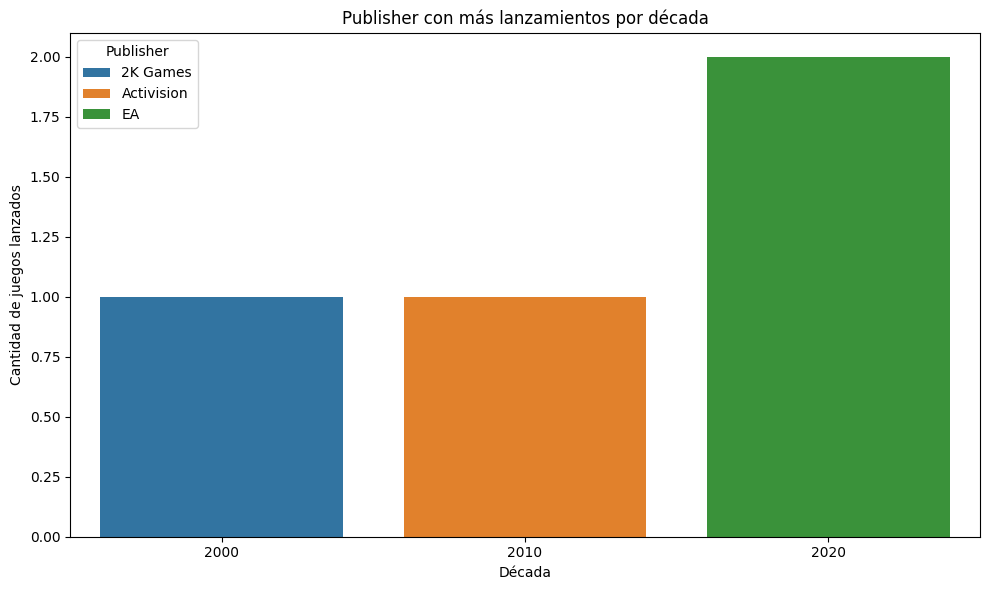

In [118]:
# RESOLUCIÓN GRÁFICA
# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=top_publishers, x='decada', y='cantidad_juegos', hue='publisher')
plt.title('Publisher con más lanzamientos por década')
plt.xlabel('Década')
plt.ylabel('Cantidad de juegos lanzados')
plt.legend(title='Publisher')
plt.tight_layout()
plt.show()

El gráfico muestra qué publisher tuvo mayor presencia en cada década según la cantidad de juegos lanzados, permitiendo identificar a los dominadores del mercado en cada periodo.

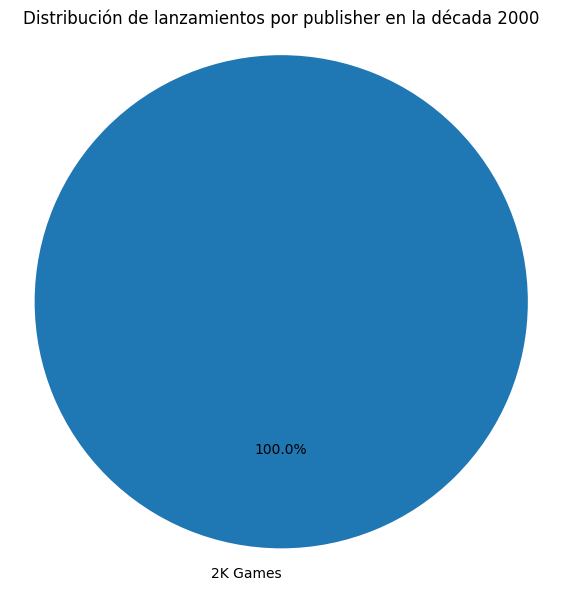

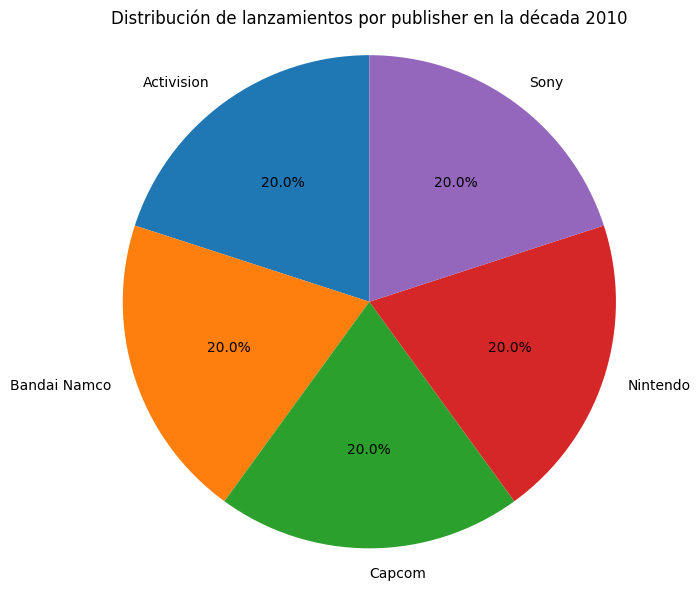

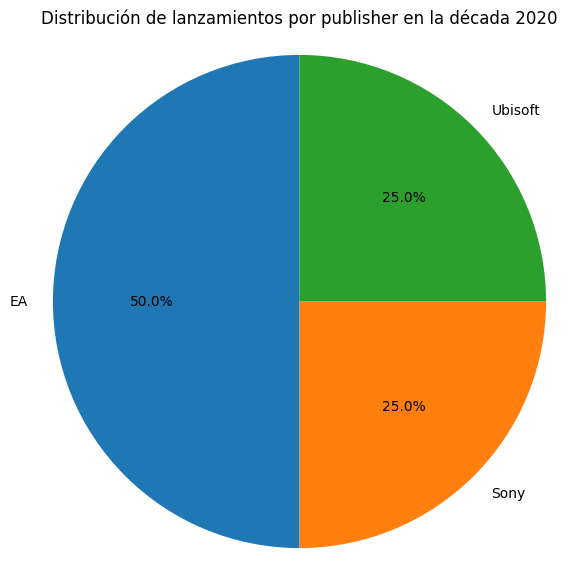

In [124]:
# Extraer la década
df_juegos['decada'] = (df_juegos['release_year'] // 10) * 10

# Contar la cantidad de juegos lanzados por publisher y década
juegos_decada = df_juegos.groupby(['decada', 'publisher']).size().reset_index(name='cantidad_juegos')

# Para cada década, obtener la distribución de lanzamientos por publisher
for decada in sorted(df_juegos['decada'].unique()):
    data_decada = juegos_decada[juegos_decada['decada'] == decada]
    plt.figure(figsize=(7,7))
    plt.pie(data_decada['cantidad_juegos'], labels=data_decada['publisher'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de lanzamientos por publisher en la década {int(decada)}')
    plt.axis('equal')
    plt.show()

Cada gráfico de torta muestra la proporción de lanzamientos de cada publisher en la década correspondiente, permitiendo visualizar claramente qué publisher dominó el mercado en cada periodo.

# # 5¿Los juegos con clasificación "M" (Mature) venden menos que los "E" (Everyone)?


In [136]:
# RESOLUCIÓN ANALÍTICA
# Filtrar solo las clasificaciones 'M' y 'E'
df_filtrado = df_juegos[df_juegos['esrb_rating'].isin(['M', 'E'])]

# Contar la cantidad de juegos por clasificación
cantidad_juegos = df_filtrado['esrb_rating'].value_counts()

print("Cantidad de juegos lanzados por clasificación ESRB:")
print(cantidad_juegos)

# Interpretación sugerida:
if cantidad_juegos['M'] < cantidad_juegos['E']:
    print("Se lanzan menos juegos con clasificación 'M' (Mature) que con clasificación 'E' (Everyone).")
else:
    print("No se observa una diferencia significativa o hay más juegos 'M' que 'E'.")

Cantidad de juegos lanzados por clasificación ESRB:
esrb_rating
E    5
M    3
Name: count, dtype: int64
Se lanzan menos juegos con clasificación 'M' (Mature) que con clasificación 'E' (Everyone).


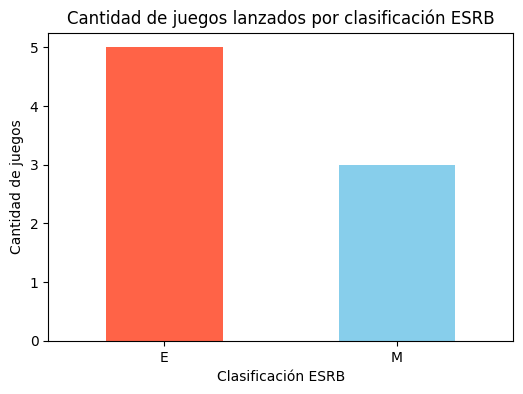

In [139]:
# RESOLUCIÓN GRÁFICA
# Gráfico de barras
plt.figure(figsize=(6,4))
cantidad_juegos.plot(kind='bar', color=['tomato', 'skyblue'])
plt.title('Cantidad de juegos lanzados por clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=0)
plt.show()

El gráfico permite comparar visualmente la cantidad de juegos lanzados para cada clasificación. Si la barra de "M" es más baja que la de "E", se confirma que hay menos juegos para público adulto que para todo público.

# #6¿Los juegos multijugador reciben mejores puntajes de críticos que los de un solo jugador?

In [145]:
# Agrupar por modo multijugador y calcular el puntaje promedio de críticos
puntaje_multiplayer = df_juegos.groupby('multiplayer')['critic_score'].mean()

print("Puntaje promedio de críticos según modo de juego:")
print("0 = Solo jugador, 1 = Multijugador")
print(puntaje_multiplayer)

# Interpretación sugerida:
if puntaje_multiplayer[1] > puntaje_multiplayer[0]:
    print("Los juegos multijugador reciben, en promedio, mejores puntajes de críticos que los de un solo jugador.")
elif puntaje_multiplayer[1] < puntaje_multiplayer[0]:
    print("Los juegos multijugador reciben, en promedio, peores puntajes de críticos que los de un solo jugador.")
else:
    print("No hay diferencia significativa en el puntaje promedio de críticos entre juegos multijugador y de un solo jugador.")

Puntaje promedio de críticos según modo de juego:
0 = Solo jugador, 1 = Multijugador
multiplayer
0    83.000000
1    84.333333
Name: critic_score, dtype: float64
Los juegos multijugador reciben, en promedio, mejores puntajes de críticos que los de un solo jugador.


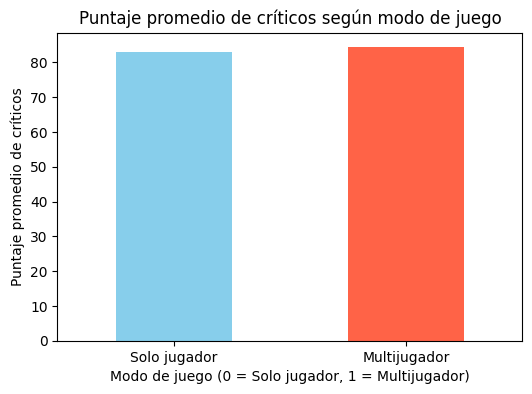

In [148]:
# Gráfico de barras (Bivariado)
plt.figure(figsize=(6,4))
puntaje_multiplayer.plot(kind='bar', color=['skyblue', 'tomato'])
plt.title('Puntaje promedio de críticos según modo de juego')
plt.xlabel('Modo de juego (0 = Solo jugador, 1 = Multijugador)')
plt.ylabel('Puntaje promedio de críticos')
plt.xticks([0,1], ['Solo jugador', 'Multijugador'], rotation=0)
plt.show()

El gráfico permite comparar visualmente si los juegos multijugador reciben mejores o peores puntajes de críticos que los de un solo jugador.

In [154]:

# MEDIDAS DE TENDENCIA CENTRAL PARA VENTAS GLOBALES

# MEDIA
print("Media de ventas globales:", df_sales['global_sales'].mean())

# MEDIANA
print("Mediana de ventas globales:", df_sales['global_sales'].median())

# MODA
print("Moda de ventas globales:", df_sales['global_sales'].mode())

Media de ventas globales: 21.4
Mediana de ventas globales: 21.95
Moda de ventas globales: 0     8.9
1    14.3
2    15.2
3    19.3
4    21.4
5    22.5
6    23.5
7    24.1
8    29.8
9    35.0
Name: global_sales, dtype: float64


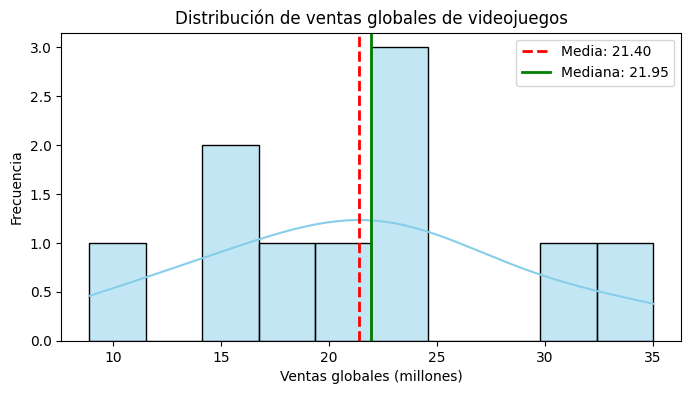

In [163]:
# Gráfico de distribución de ventas globales
# Gráfico de distribución con colores
# Calcular media y mediana
media = df_sales['global_sales'].mean()
mediana = df_sales['global_sales'].median()

plt.figure(figsize=(8,4))
sns.histplot(df_sales['global_sales'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.title('Distribución de ventas globales de videojuegos')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

La línea roja indica la media y la línea verde la mediana, facilitando la comparación visual de ambas medidas sobre la distribución de ventas.

In [166]:
# MEDIDAS DE VARIABILIDAD O DISPERSIÓN

# VARIANZA
print("Varianza:", df_sales['global_sales'].var())

# DESVIACIÓN ESTÁNDAR
print("Desviación estándar:", df_sales['global_sales'].std())

# RANGO
print("Rango:", df_sales['global_sales'].max() - df_sales['global_sales'].min())

# COEFICIENTE DE VARIABILIDAD
cv = df_sales['global_sales'].std() / df_sales['global_sales'].mean()
print("Coeficiente de variabilidad:", cv)

# Interpretación sugerida:
if cv < 0.05:
    print("CV < 5%: La variable es normal y representativa.")
else:
    print("CV > 5%: La variable no es normal o no es representativa.")

Varianza: 57.54888888888888
Desviación estándar: 7.586098396994919
Rango: 26.1
Coeficiente de variabilidad: 0.35449057929882805
CV > 5%: La variable no es normal o no es representativa.


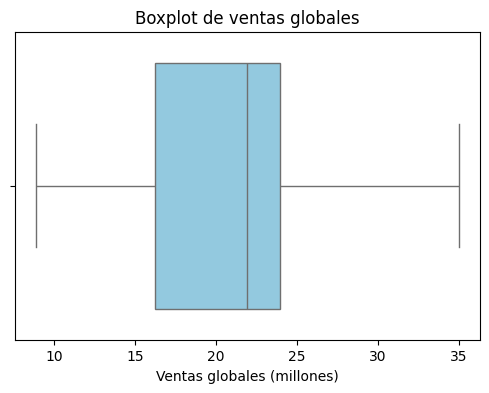

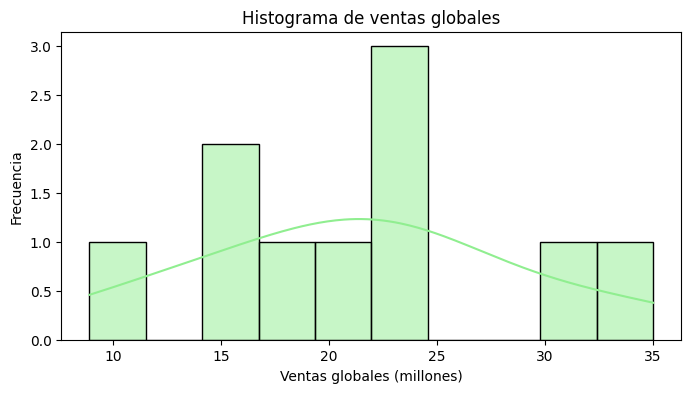

In [175]:
# Boxplot para visualizar la dispersión
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_sales['global_sales'], color='skyblue')
plt.title('Boxplot de ventas globales')
plt.xlabel('Ventas globales (millones)')
plt.show()

# Histograma para visualizar la distribución y dispersión
plt.figure(figsize=(8, 4))
sns.histplot(df_sales['global_sales'], bins=10, kde=True, color='lightgreen', edgecolor='black')
plt.title('Histograma de ventas globales')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Frecuencia')
plt.show()

In [169]:

# MEDIDAS DE POSICIÓN O CONCENTRACIÓN

# CUANTILES
print("Cuantiles (Q1, Q2, Q3):")
print(df_sales['global_sales'].quantile([0.25, 0.5, 0.75]))

# PERCENTIL 90
print("Percentil 90:")
print(df_sales['global_sales'].quantile(0.90))

Cuantiles (Q1, Q2, Q3):
0.25    16.225
0.50    21.950
0.75    23.950
Name: global_sales, dtype: float64
Percentil 90:
30.32


Los cuantiles (Q1, Q2, Q3) dividen la distribución de las ventas globales en cuatro partes iguales, mostrando los valores por debajo de los cuales se encuentra el 25%, 50% y 75% de los datos, respectivamente.
El percentil 90 indica el valor por debajo del cual se encuentra el 90% de las ventas globales. Estos indicadores permiten identificar la concentración y dispersión de las ventas, así como detectar posibles valores atípicos o juegos con ventas excepcionalmente altas.

Text(0.5, 1.0, 'Distribución de ventas globales con cuantiles y percentil 90')

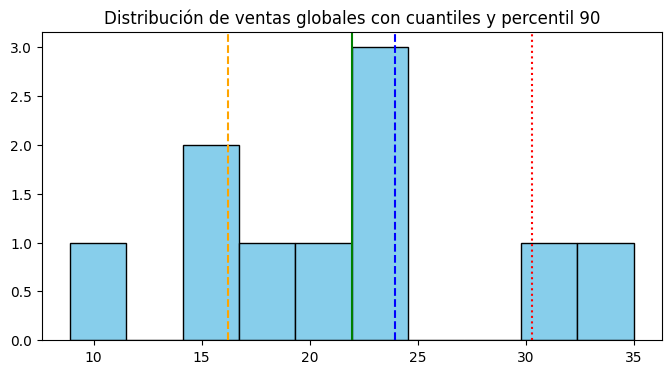

In [172]:
# Calcular cuantiles y percentil 90
q1 = df_sales['global_sales'].quantile(0.25)
q2 = df_sales['global_sales'].quantile(0.5)
q3 = df_sales['global_sales'].quantile(0.75)
p90 = df_sales['global_sales'].quantile(0.90)

# Histograma con líneas de cuantiles y percentil 90
plt.figure(figsize=(8,4))
plt.hist(df_sales['global_sales'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(q1, color='orange', linestyle='--', label=f'Q1 (25%): {q1:.2f}')
plt.axvline(q2, color='green', linestyle='-', label=f'Q2/Mediana (50%): {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3 (75%): {q3:.2f}')
plt.axvline(p90, color='red', linestyle=':', label=f'P90 (90%): {p90:.2f}')
plt.title('Distribución de ventas globales con cuantiles y percentil 90')

Este gráfico te permite visualizar cómo se distribuyen las ventas globales y dónde se ubican los cuantiles y el percentil 90.

Asimetría (skewness): 0.1844581252816995
Distribución asimétrica positiva (cola a la derecha).


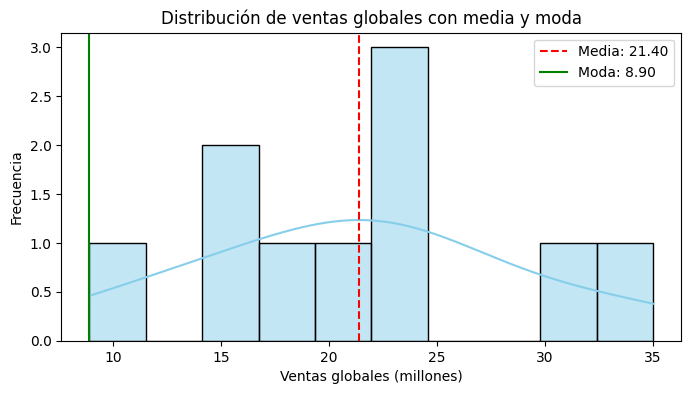

In [181]:
#MEDIDAS DE FORMA

#SI Mo > media -> ASIMETICA NEGATIVA
#SI Mo = media -> SIMETRICA
#SI Mo < media -> ASIMETICA POSITIVA

# Calcular la asimetría (skewness)
asimetria = df_sales['global_sales'].skew()
print("Asimetría (skewness):", asimetria)

# Calcular media y moda
media = df_sales['global_sales'].mean()
moda = df_sales['global_sales'].mode()[0]

# Interpretación de la asimetría
if moda > media:
    print("Distribución asimétrica negativa (cola a la izquierda).")
elif moda == media:
    print("Distribución simétrica.")
else:
    print("Distribución asimétrica positiva (cola a la derecha).")


# Gráfico: Histograma con líneas de media y moda
plt.figure(figsize=(8,4))
sns.histplot(df_sales['global_sales'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(moda, color='green', linestyle='-', label=f'Moda: {moda:.2f}')
plt.title('Distribución de ventas globales con media y moda')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



La asimetría indica si la distribución de ventas globales está sesgada hacia valores altos (asimetría positiva) o bajos (asimetría negativa). El gráfico muestra visualmente la relación entre la media y la moda.